In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, log_loss
import matplotlib.pyplot as plt

df = pd.read_csv('card_transdata.csv')
display(df)
print(df.shape)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


(1000000, 8)


In [11]:
df[df.isna().any(axis=1)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud


In [12]:
# No data instances with missing values
# no processing needed

In [13]:
df =  df.sample(frac=1) # shuffle the dataset
X = df.iloc[:,[0, 1, 2, 3, 4, 5, 6]]
y = df.iloc[:,[7]]
display(X)
display(y)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
936790,2.176847,5.590957,5.156165,1.0,0.0,0.0,0.0
546375,5.939369,94.978287,0.326725,1.0,0.0,0.0,0.0
166010,10.075462,0.309360,1.245672,1.0,0.0,0.0,1.0
435036,65.319843,0.246639,1.711881,1.0,0.0,0.0,1.0
945131,24.239136,0.133893,0.254753,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
882473,1.313399,0.920318,2.215637,0.0,0.0,0.0,1.0
335476,5.320367,0.680034,1.124964,1.0,0.0,0.0,1.0
343800,1.829771,2.537938,2.069484,0.0,0.0,0.0,1.0
48496,5.873216,1.465645,5.081243,1.0,1.0,1.0,0.0


,fraud
936790,0.0
546375,0.0
166010,0.0
435036,0.0
945131,0.0
...,...
882473,0.0
335476,0.0
343800,0.0
48496,0.0


In [14]:
# using the train test split function (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, random_state=42, test_size=0.2, shuffle=False)
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))
print(X_train.head()) # make sure the x and y align to each data instance
print(y_train.head())

800000
800000
200000
200000
        distance_from_home  distance_from_last_transaction  \
936790            2.176847                        5.590957   
546375            5.939369                       94.978287   
166010           10.075462                        0.309360   
435036           65.319843                        0.246639   
945131           24.239136                        0.133893   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
936790                        5.156165              1.0        0.0   
546375                        0.326725              1.0        0.0   
166010                        1.245672              1.0        0.0   
435036                        1.711881              1.0        0.0   
945131                        0.254753              1.0        1.0   

        used_pin_number  online_order  
936790              0.0           0.0  
546375              0.0           0.0  
166010              0.0           1.0  
435036            

In [15]:
model = GaussianNB()
 
# Train the model
model.fit(X_train, y_train.values.ravel())
 
# Predict the labels for the test set
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# class probabilities for log loss function
train_pred_proba = model.predict_proba(X_train)
test_pred_proba = model.predict_proba(X_test)

In [16]:
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)
train_sensitivity = recall_score(y_train, train_pred, average='binary', pos_label=1)
test_sensitivity = recall_score(y_test, test_pred, average='binary', pos_label=1)
train_specificity = recall_score(y_train, train_pred, average='binary', pos_label=0)
test_specificity = recall_score(y_test, test_pred, average='binary', pos_label=0)
train_f1 = f1_score(y_train, train_pred, average='binary')
test_f1 = f1_score(y_test, test_pred, average='binary')
train_logloss = log_loss(y_train, train_pred_proba)
test_logloss = log_loss(y_test, test_pred_proba)


In [17]:
metric = {
    'Metrics': ['Accuracy', 'Sensitivity', 'Specificity', 'F1 Score', 'Log Loss'],
    'Training': [train_accuracy, train_sensitivity, train_specificity, train_f1, train_logloss],
    'Test' : [test_accuracy, test_sensitivity, test_specificity, test_f1, test_logloss]
}

# Replace header by the first row
metric = pd.DataFrame(metric).T
metric.columns = metric.iloc[0]
metric = metric[1:]
display(metric)


Metrics,Accuracy,Sensitivity,Specificity,F1 Score,Log Loss
Training,0.95068,0.593299,0.9848,0.677088,0.303561
Test,0.949905,0.593009,0.984516,0.676692,0.307684


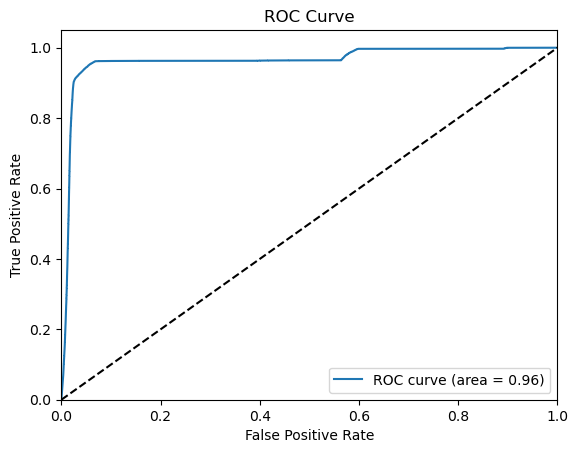

In [18]:
# Plotting ROC Curve (AUC)
test_class_1_prob = test_pred_proba[:,1] # get the probabilites to be labeled 1
fpr, tpr, threshold = metrics.roc_curve(y_test, test_class_1_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()